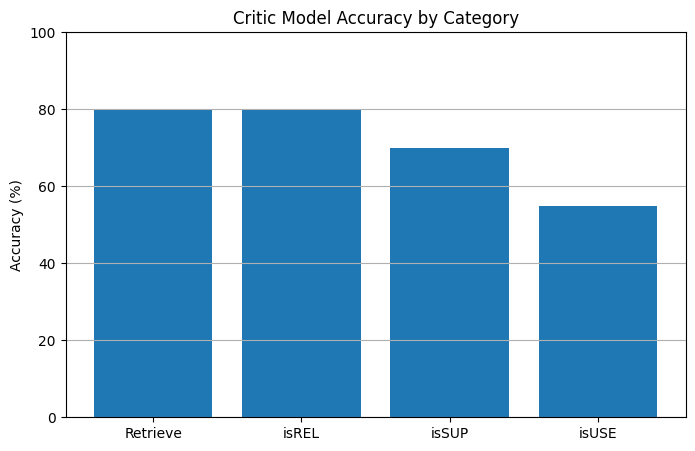

In [1]:
import matplotlib.pyplot as plt

# Replace these with your actual results from evaluation logs
categories = ['Retrieve', 'isREL', 'isSUP', 'isUSE']
accuracies = [80.00, 80.00, 70.00, 55.00]

plt.figure(figsize=(8,5))
plt.bar(categories, accuracies)
plt.title('Critic Model Accuracy by Category')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


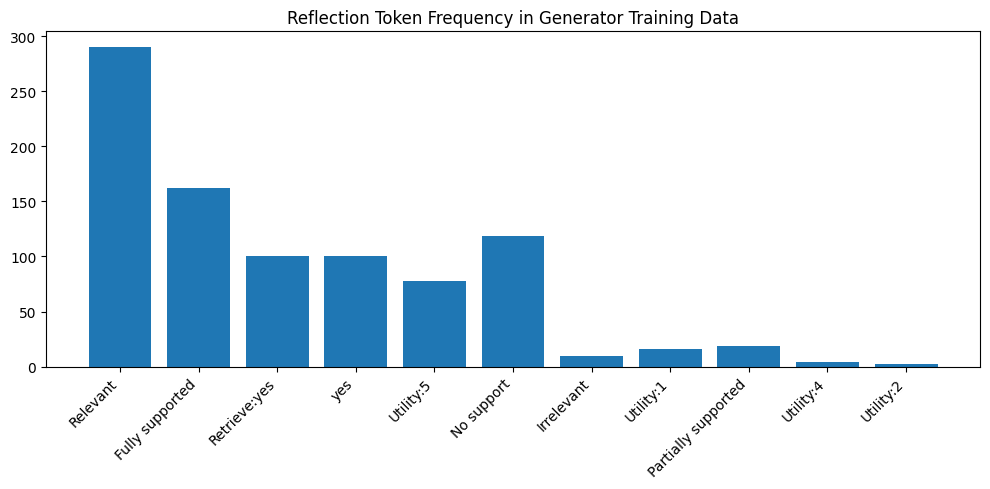

NameError: name 'ç' is not defined

In [2]:
import json
import re
import matplotlib.pyplot as plt
from collections import Counter

file_path = '../data/selfrag_generator_train_augmented.jsonl'

token_pattern = re.compile(r'\[(Retrieve:(yes|no))\]|\[(Relevant|Irrelevant)\]|\[(Fully supported|Partially supported|No support)\]|\[(Utility:[1-5])\]')

counts = Counter()

with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        data = json.loads(line)
        text = data.get('text', '')
        tokens = token_pattern.findall(text)
        # tokens is a list of tuples with multiple groups, flatten and filter
        flat_tokens = []
        for groups in tokens:
            for token in groups:
                if token != '':
                    flat_tokens.append(token)
        counts.update(flat_tokens)

# Plot counts for main token categories (you can customize)
labels = list(counts.keys())
values = [counts[label] for label in labels]

plt.figure(figsize=(10,5))
plt.bar(labels, values)
plt.title('Reflection Token Frequency in Generator Training Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
ç

In [4]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



    =================== Problem and Motivation ===================

    Large language models (LLMs) generate fluent text but often hallucinate 
    or produce inaccurate information without grounding in evidence. They 
    lack mechanisms for self-evaluation or adaptive retrieval, limiting their 
    use in knowledge-critical domains.

    SELF-RAG addresses these issues by combining:
    1) Retrieval-augmented generation to ground answers on external documents.
    2) A critic model producing reflection tokens (e.g. [Relevant], [Retrieve:yes]) 
       that self-evaluate output quality.
    3) Adaptive retrieval and generation controlled by reflection tokens to balance 
       factual accuracy and creativity efficiently.

    Your implementation demonstrates:
    - Integration of retrieval, critic, and generator models.
    - Training with augmented data containing reflection tokens.
    - Use of local LLaMA models via Ollama for generation.
    - Effective quoting of retrieved passa

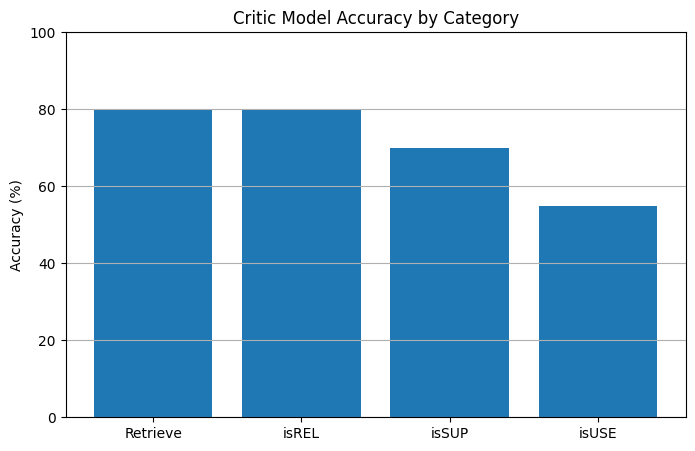

FileNotFoundError: [Errno 2] No such file or directory: 'data/selfrag_generator_train_augmented.jsonl'

In [ ]:
import json
import re
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# --------- Explanation Section ---------
def print_problem_analysis():
    explanation = """
    =================== Problem and Motivation ===================

    Large language models (LLMs) generate fluent text but often hallucinate 
    or produce inaccurate information without grounding in evidence. They 
    lack mechanisms for self-evaluation or adaptive retrieval, limiting their 
    use in knowledge-critical domains.

    SELF-RAG addresses these issues by combining:
    1) Retrieval-augmented generation to ground answers on external documents.
    2) A critic model producing reflection tokens (e.g. [Relevant], [Retrieve:yes]) 
       that self-evaluate output quality.
    3) Adaptive retrieval and generation controlled by reflection tokens to balance 
       factual accuracy and creativity efficiently.

    Your implementation demonstrates:
    - Integration of retrieval, critic, and generator models.
    - Training with augmented data containing reflection tokens.
    - Use of local LLaMA models via Ollama for generation.
    - Effective quoting of retrieved passages and dynamic generation control.

    ===============================================================
    """
    print(explanation)


# --------- Load and parse reflection tokens ---------
def parse_reflection_tokens(text):
    flat_text = " ".join(text.strip().split())
    pattern = (
        r"\[(Retrieve:(yes|no))\].*?"
        r"\[(Relevant|Irrelevant)\].*?"
        r"\[(Fully supported|Partially supported|No support)\].*?"
        r"\[(Utility:[1-5])\]"
    )
    match = re.search(pattern, flat_text, re.IGNORECASE)
    if match:
        return {
            "Retrieve": match.group(1),
            "isREL": match.group(3),
            "isSUP": match.group(4),
            "isUSE": match.group(5),
        }
    return None


# --------- Critic accuracy plot ---------
def plot_critic_accuracy(accuracy_dict):
    categories = list(accuracy_dict.keys())
    accuracies = [accuracy_dict[k] for k in categories]

    plt.figure(figsize=(8,5))
    plt.bar(categories, accuracies)
    plt.title('Critic Model Accuracy by Category')
    plt.ylabel('Accuracy (%)')
    plt.ylim(0, 100)
    plt.grid(axis='y')
    plt.show()


# --------- Reflection token frequency ---------
def plot_reflection_token_frequency(jsonl_path):
    token_pattern = re.compile(
        r'\[(Retrieve:(yes|no))\]|\[(Relevant|Irrelevant)\]|\[(Fully supported|Partially supported|No support)\]|\[(Utility:[1-5])\]'
    )
    counts = Counter()

    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            text = data.get('text', '')
            tokens = token_pattern.findall(text)
            for groups in tokens:
                for token in groups:
                    if token != '':
                        counts[token] += 1

    labels = list(counts.keys())
    values = [counts[label] for label in labels]

    plt.figure(figsize=(12,6))
    plt.bar(labels, values)
    plt.xticks(rotation=45, ha='right')
    plt.title('Reflection Token Frequencies')
    plt.tight_layout()
    plt.show()


# --------- Training loss plot ---------
def plot_training_loss(epochs, losses):
    plt.figure(figsize=(8,5))
    plt.plot(epochs, losses, marker='o')
    plt.title('Generator Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()


# --------- Example usage ---------
if __name__ == "__main__":
    print_problem_analysis()

    # Example critic accuracies from your evaluation
    critic_acc = {
        "Retrieve": 80.0,
        "isREL": 80.0,
        "isSUP": 70.0,
        "isUSE": 55.0,
    }
    plot_critic_accuracy(critic_acc)

    # Plot reflection token frequency from your generated training data
    jsonl_file = "../data/selfrag_generator_train_augmented.jsonl"  # replace with your file
    plot_reflection_token_frequency(jsonl_file)

    # Plot training loss curve (replace with your actual values)
    example_epochs = [1, 2, 3]
    example_losses = [3.5, 2.95, 2.6]
    plot_training_loss(example_epochs, example_losses)

    print("\nAnalysis complete. Use these insights to discuss system performance, strengths, and limitations in your report.")
